#**K nearest neighbour algorithm**

#Import required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

#Load the dataset

In [30]:
df = pd.read_csv("/content/sample_data/auto-mpg.csv")

In [31]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [32]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [33]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
df.describe(include = "O")

,car name
count,398
unique,305
top,ford pinto
freq,6


In [35]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [36]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [37]:
df.horsepower = df.horsepower.fillna(df.horsepower.mean())

In [38]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [39]:
print(*df.columns, sep= " | ")

mpg | cylinders | displacement | horsepower | weight | acceleration | model year | origin | car name


dropping the car name feature not useful for the predicting the origin

In [40]:
features = df.columns
features = df.drop(["car name", 'origin'], axis = 1)


In [41]:
X = features
y = df.origin

In [42]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


# Train and test splitting

#Scaling the data

/tmp/ipython-input-3398091251.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X.transpose(), labels = features)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b7e56d96d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7e56d971d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7e56d96a80>,
 'medians': [<matplotlib.lines.Line2D at 0x7b7e56d97710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b7e56d979b0>,
 'means': []}

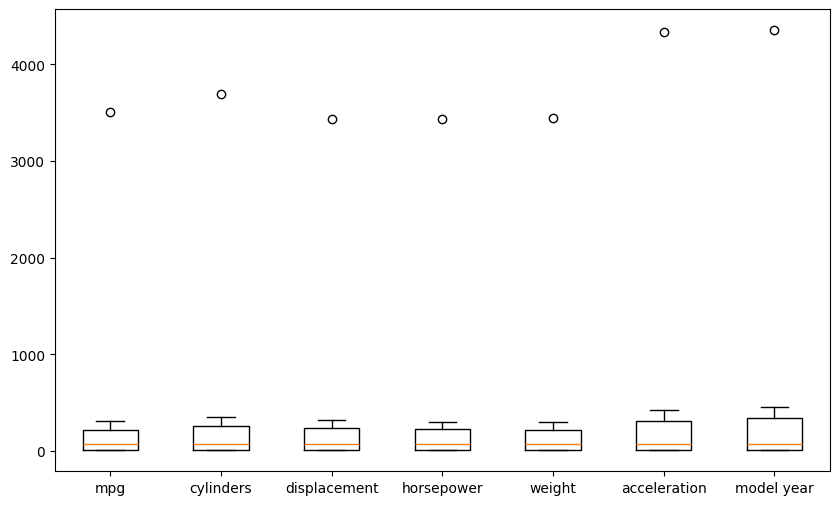

In [43]:
plt.figure(figsize = (10,6))
plt.boxplot(X.transpose(), labels = features)

In [44]:
print(X.shape, y.shape)

(398, 7) (398,)


##The data is highly imbalanced. Usig MinMaxScaler to scale the data

In [45]:
scl = MinMaxScaler()

In [46]:
X = scl.fit_transform(X)

/tmp/ipython-input-3398091251.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X.transpose(), labels = features)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b7e56e03dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b7e56e28350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b7e56e03b30>,
 'medians': [<matplotlib.lines.Line2D at 0x7b7e56e28830>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b7e56e28bf0>,
 'means': []}

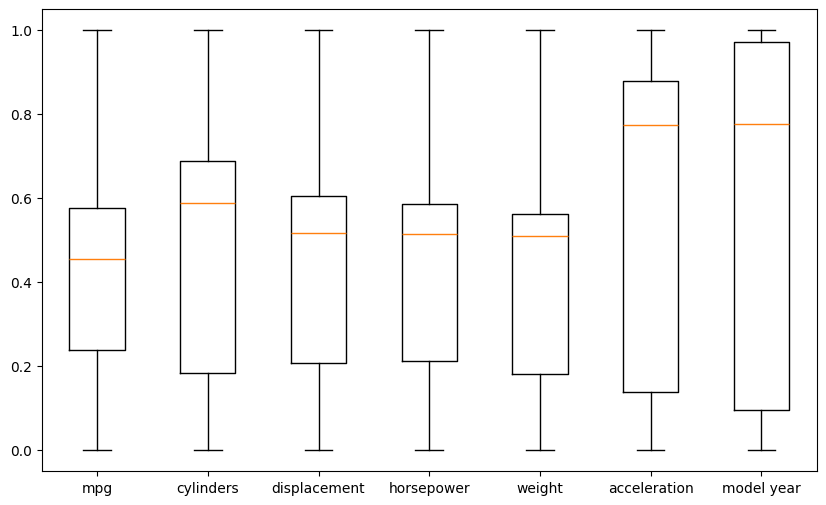

In [47]:
plt.figure(figsize = (10,6))
plt.boxplot(X.transpose(), labels = features)

In [48]:
target_ratio = y.value_counts()/len(y)

In [49]:
target_ratio

,count
origin,
1,0.625628
3,0.198492
2,0.175879


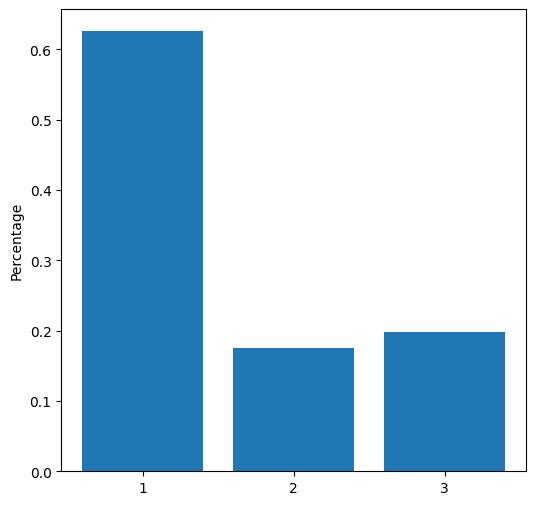

In [50]:
plt.figure(figsize = (6,6))
plt.bar(target_ratio.index, target_ratio)
plt.ylabel('Percentage')
plt.xticks(target_ratio.index)
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Knn algorithm

In [52]:
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn6.fit(X_train,y_train)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##Accuracy score

In [53]:
pred_knn6= knn6.predict(X_test)
pred_knn3= knn3.predict(X_test)

In [54]:
print("Accuracy Score knn6: ", accuracy_score(y_test, pred_knn6))
print("Accuracy Score knn3: ", accuracy_score(y_test, pred_knn3))

Accuracy Score knn6:  0.75
Accuracy Score knn3:  0.7375


In [61]:
dummy_y_test=pd.get_dummies(y_test, dtype = int)
dummy_y_test.head()

,1,2,3
198,0,0,1
396,1,0,0
33,1,0,0
208,1,0,0
93,1,0,0


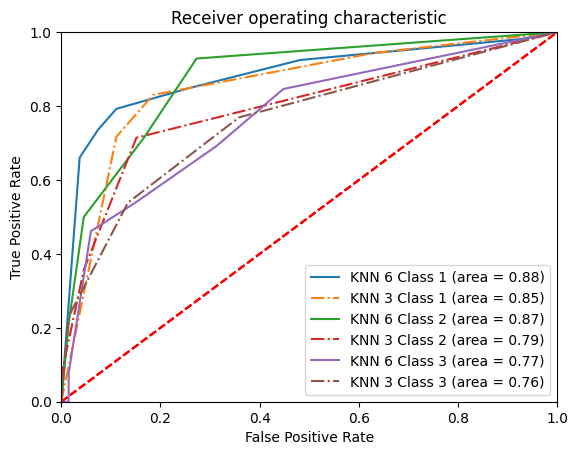

In [62]:
knn6_prob=knn6.predict_proba(X_test).T
knn3_prob=knn3.predict_proba(X_test).T

dummy_y_test=pd.get_dummies(y_test, dtype = int)

knn6_roc_auc=dict()
knn3_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds6=dict()
lthresholds3=dict()
for i in dummy_y_test.columns:
    knn6_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i], ltpr6[i], lthresholds6[i] = roc_curve(dummy_y_test[i], knn6_prob[i-1])
    lfpr3[i], ltpr3[i], lthresholds3[i] = roc_curve(dummy_y_test[i], knn3_prob[i-1])


for i in dummy_y_test.columns:
    plt.plot(lfpr6[i], ltpr6[i], label='KNN 6 Class '+str(i)+ ' (area = %0.2f)' % knn6_roc_auc[i])
    plt.plot(lfpr3[i], ltpr3[i],'-.', label='KNN 3 Class '+str(i)+ ' (area = %0.2f)' % knn3_roc_auc[i])
    plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()





/tmp/ipython-input-1065138563.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


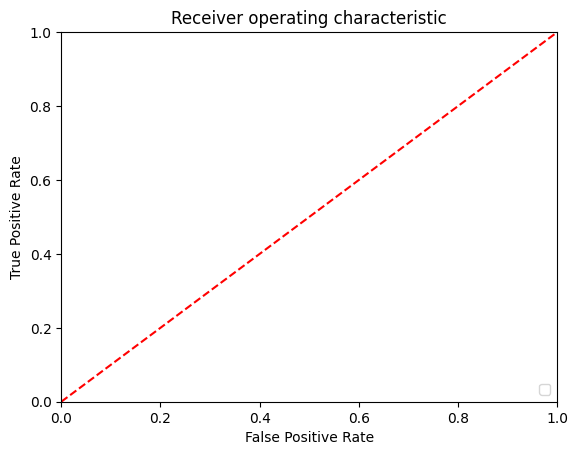

In [56]:
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()